In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
url ='https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/BP_data.csv'
df = pd.read_csv(url)
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [44]:
df.info() # 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   1908 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      442 non-null    float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    1758 non-null   float64
 12  Level_of_Stress                2000 non-null   i

In [45]:
df.isnull().sum() # 결측치 확인
df = df.drop(columns=['Patient_Number','Pregnancy'])

In [46]:
# 결측치 처리
df["Genetic_Pedigree_Coefficient"] = df["Genetic_Pedigree_Coefficient"].fillna(df["Genetic_Pedigree_Coefficient"].mean()) # 결측치 평균으로 대체
df["alcohol_consumption_per_day"] = df["alcohol_consumption_per_day"].fillna(df["alcohol_consumption_per_day"].mean()) # 결측치 평균으로 대체

In [47]:
df.dropna(inplace=True) # 결측치가 있는 행 삭제

In [48]:
df.info() # 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Blood_Pressure_Abnormality     2000 non-null   int64  
 1   Level_of_Hemoglobin            2000 non-null   float64
 2   Genetic_Pedigree_Coefficient   2000 non-null   float64
 3   Age                            2000 non-null   int64  
 4   BMI                            2000 non-null   int64  
 5   Sex                            2000 non-null   int64  
 6   Smoking                        2000 non-null   int64  
 7   Physical_activity              2000 non-null   int64  
 8   salt_content_in_the_diet       2000 non-null   int64  
 9   alcohol_consumption_per_day    2000 non-null   float64
 10  Level_of_Stress                2000 non-null   int64  
 11  Chronic_kidney_disease         2000 non-null   int64  
 12  Adrenal_and_thyroid_disorders  2000 non-null   i

In [49]:
from sklearn.preprocessing import StandardScaler
# 데이터 분리
X= df.drop(columns=['Chronic_kidney_disease','Adrenal_and_thyroid_disorders'])
y= df[['Chronic_kidney_disease','Adrenal_and_thyroid_disorders']]
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(df)
X_scaled

array([[ 1.01308561, -0.19670848,  1.42233366, ..., -0.01517697,
         0.9900495 ,  1.12017473],
       [-0.98708341, -0.89656771, -0.9295975 , ...,  1.19898069,
        -1.0100505 , -0.89271787],
       [ 1.01308561, -0.4208464 ,  1.45743711, ..., -0.01517697,
         0.9900495 , -0.89271787],
       ...,
       [ 1.01308561,  2.37859055, -0.96470095, ..., -0.01517697,
         0.9900495 ,  1.12017473],
       [-0.98708341, -0.25617364,  0.79047156, ...,  1.19898069,
        -1.0100505 ,  1.12017473],
       [ 1.01308561, -0.16011453, -1.4210458 , ..., -1.22933464,
         0.9900495 , -0.89271787]])

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [51]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 모델 정의
model = Sequential()
model.add(Dense(13, input_shape=(X_train.shape[1],), activation='relu'))  # 입력층
model.add(Dense(32, activation='relu'))  # 은닉층
model.add(Dense(32, activation='relu'))  # 은닉층
model.add(Dense(y_train.shape[1], activation='sigmoid'))  # 출력층 (라벨 개수)

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 요약
model.summary()


c:\Users\outla\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 13)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,752 (6.84 KB)

 Trainable params: 1,752 (6.84 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:

# 모델 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4287 - loss: 0.6568 - val_accuracy: 0.5225 - val_loss: 0.5274
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5953 - loss: 0.4784 - val_accuracy: 0.5700 - val_loss: 0.3077
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6520 - loss: 0.2443 - val_accuracy: 0.6950 - val_loss: 0.1176
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7588 - loss: 0.0863 - val_accuracy: 0.7500 - val_loss: 0.0408
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7775 - loss: 0.0298 - val_accuracy: 0.7875 - val_loss: 0.0180
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8289 - loss: 0.0133 - val_accuracy: 0.7750 - val_loss: 0.0099
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7950 - loss: 0.0068 - val_accuracy: 0.7825 - val_loss: 0.0062
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8026 - loss: 0.0045 - val_accuracy: 0.7650 - val_loss:

In [53]:
model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([[9.99997497e-01, 1.93351407e-05],
       [8.03583043e-06, 9.99999940e-01],
       [3.26187910e-05, 3.30530340e-04],
       [9.99951363e-01, 1.63662583e-06],
       [1.38451151e-06, 6.16317675e-06],
       [3.06111758e-07, 9.99957979e-01],
       [4.97392705e-07, 9.99997318e-01],
       [9.99994993e-01, 9.99996603e-01],
       [9.99960959e-01, 1.36993467e-05],
       [9.99999464e-01, 3.43419629e-06],
       [1.72241944e-05, 6.66870692e-05],
       [9.99999404e-01, 9.99998987e-01],
       [9.99998569e-01, 4.61806076e-06],
       [1.26123450e-05, 2.59926560e-06],
       [1.38272408e-05, 9.99998868e-01],
       [9.99999881e-01, 4.55772861e-05],
       [3.20612053e-05, 2.28122663e-05],
       [9.99994874e-01, 1.40553557e-05],
       [9.99672353e-01, 3.69563822e-05],
       [2.00669438e-05, 7.22546565e-06],
       [3.42304247e-07, 9.99981999e-01],
       [9.99999642e-01, 1.30972467e-06],
       [9.99999881e-01, 4.42324126e-05],
       [9.67384676e-06, 9.99996245e-01],
       [5.451337

In [54]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# y_test와 y_pred_class를 Numpy 배열로 변환
y_test_class = np.argmax(y_test.values, axis=1)  # 실제값에서 가장 높은 확률의 클래스 선택
y_pred_class = np.argmax(y_pred, axis=1)  # 예측값에서 가장 높은 확률의 클래스 선택

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

# Classification Report 출력
print("Classification Report:\n", classification_report(y_test_class, y_pred_class))

# 혼동 행렬 출력
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.69      0.82       328
           1       0.42      1.00      0.59        72

    accuracy                           0.75       400
   macro avg       0.71      0.85      0.70       400
weighted avg       0.89      0.75      0.78       400

Confusion Matrix:
 [[227 101]
 [  0  72]]


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


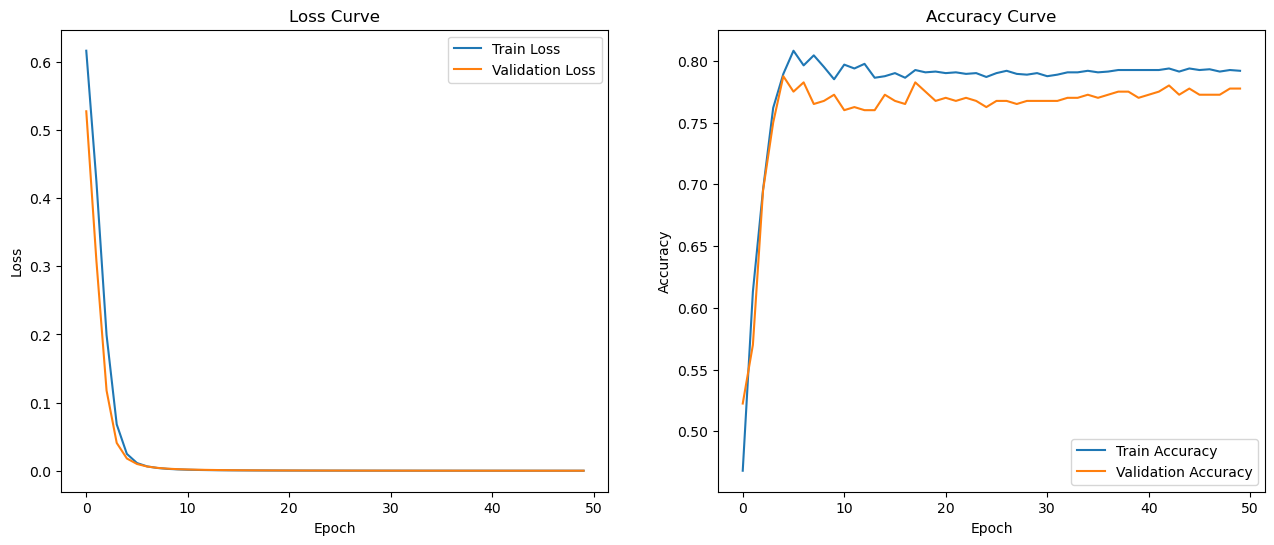

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# 기존 학습 그래프
plt.figure(figsize=(24, 6))

#  손실(Loss) 그래프
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

# 정확도(Accuracy) 그래프
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()

y_pred = model.predict(X_test) 


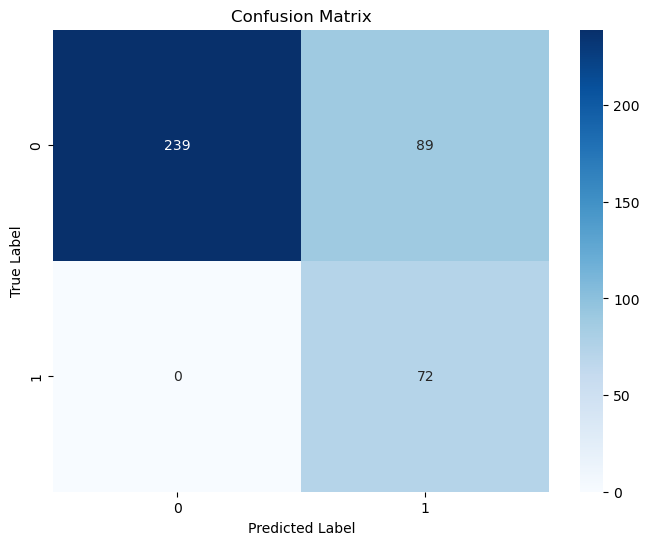

In [56]:
y_pred_class = y_pred.argmax(axis=1)  # 예측값에서 가장 높은 확률의 클래스 선택
y_test_class = y_test.values.argmax(axis=1)  # 실제값에서 가장 높은 확률의 클래스 선택

conf_matrix = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(y_test.shape[1]), yticklabels=range(y_test.shape[1]))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()